# Group Members :

- Mikio Harman 

- [Eatidal Almutairi](https://gist.github.com/eatidal/)

- [Hailah Alharthi
](https://github.com/helah20)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>

### Data
- [Dog & Horse](https://github.com/gumdropsteve/datasets/blob/master/dog_or_horse.csv)
- [Seattle Rain](https://github.com/gumdropsteve/datasets/blob/master/seattle_weather_1948-2017.csv)


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [48]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
85,38.0,106.0,0.0,dog
120,45.0,174.0,1.0,horse
131,62.0,151.0,1.0,horse


In [49]:
X=df_dh[['height' ,'weight']]


In [50]:
# Scale Data
ss=StandardScaler()
sc=ss.fit_transform(X)


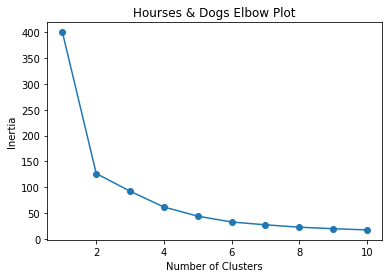

In [51]:
# Create Elbow Plot

inertia_ls = [] # save inertia values
for k in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(sc) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Hourses & Dogs Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

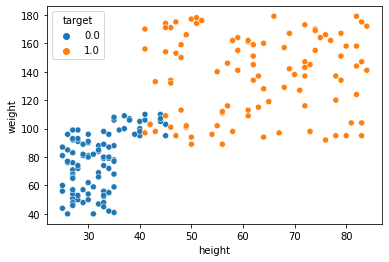

In [52]:

sns.scatterplot(x='height' ,y='weight',hue='target', data=df_dh)

In [53]:
# Apply KMeans and Plot KMeans Results and Actual Results
km=KMeans(n_clusters=2)
preds=km.fit_predict(sc) # make labe and prediction in single step


In [54]:
# Compute Accuracy Score of KMean Labels with True Labels
df_dh["labels"] =preds


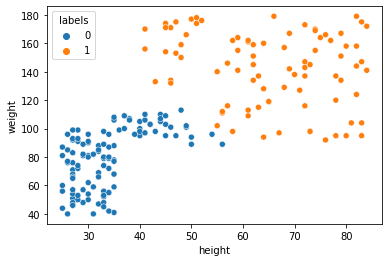

In [55]:
sns.scatterplot(x='height' ,y='weight',hue='labels', data=df_dh)

In [56]:
accuracy_score(df_dh['target'],preds)

0.935

#### Seattle Weather KMeans Challenge

In [57]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
21785,2007-08-24,0.00,79,57,False
15216,1989-08-29,0.00,77,56,False
22246,2008-11-27,0.01,48,34,True


In [58]:
df_sea.dropna(inplace=True)

In [75]:
X=df_sea[['prcp', 'tmax', 'tmin']]
y=df_sea.rain.astype(int)


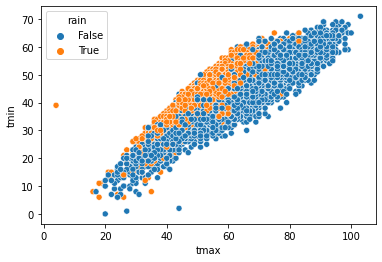

In [60]:
sns.scatterplot(x='tmax' , y='tmin' ,hue='rain', data=df_sea)

In [61]:
# Scale Data
ss2=StandardScaler()
sc2=ss2.fit_transform(X)

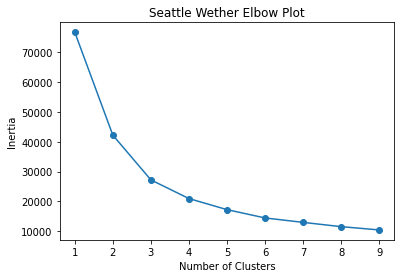

In [62]:
# Create Elbow Plot
inertia_ls = [] # save inertia values
for k in range(1, 10): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(sc2) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 10)], inertia_ls, marker="o")
plt.title("Seattle Wether Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

In [63]:
# Apply KMeans and Plot KMeans Results and Actual Results
km=KMeans(n_clusters=2)
preds=km.fit_predict(sc2) # make labe and prediction in single step
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [64]:
df_sea["labels"] =preds


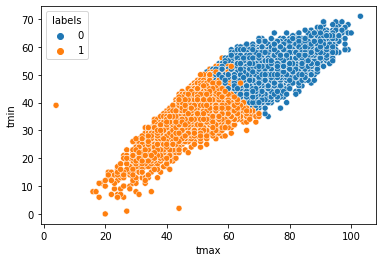

In [65]:
# Compute Accuracy Score of KMean Labels with True Labels
sns.scatterplot(x='tmax' , y='tmin' ,hue='labels', data=df_sea)

In [66]:
df_sea.shape

(25548, 6)

In [67]:
len(df_sea.rain),len( df_sea["labels"])

(25548, 25548)

In [76]:
y 

0        1
1        1
2        1
3        1
4        1
        ..
25546    0
25547    0
25548    0
25549    0
25550    0
Name: rain, Length: 25548, dtype: int64

In [77]:
preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [78]:
 accuracy_score(y, preds ) # Classification metrics can't handle a mix of unknown and binary targets

0.6631438860184751

**bad result becuase Kmean used for decriptive dataset to defind cluster for each group not predective data**



#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
# Defind X
X=df_blob

In [ ]:
# Scale Data
ss1=StandardScaler()
sc1=ss1.fit_transform(X)

In [ ]:
# Create Elbow Plot
inertia_ls = [] # save inertia values
for k in range(1, 15): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(sc1) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 15)], inertia_ls, marker="o")
plt.title("blob Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

In [ ]:
# Apply KMeans and Plot KMeans Results
km=KMeans(n_clusters=12)
preds=km.fit_predict(sc1) # make labe and prediction in single step

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
df_blob["labels"] =preds

In [ ]:
sns.scatterplot(x=1 , y=0 ,hue='labels', data=df_blob , cmap='Blous')